In [181]:
%matplotlib inline
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import log10


In [182]:
# Reads csv file to dataframe
#usvideos = pd.read_csv("USvideos.csv")
#category = pd.read_csv("categories.csv")
#FRvideos = pd.read_csv("./FRvideos.csv")
#merged_file = pd.merge(usvideos,category,how="left",on="category_id")


In [183]:

US_clean_file = pd.read_csv("Youtube_cleanfile.csv")
FR_clean_file = pd.read_csv("FranceYoutube_cleanfile.csv")

In [184]:
# dropped columns that are not required from US and FRANCE youtube files
organized_US = US_clean_file[["publish_time","trending_date","video_id","title","channel_title", \
                            "category_id","Category Name","views","likes","dislikes","comment_count"]]
organized_FR = FR_clean_file[["publish_time","trending_date","video_id","title","channel_title", \
                            "category_id","Category Name","views","likes","dislikes","comment_count"]]
organized_US.head()

,publish_time,trending_date,video_id,title,channel_title,category_id,Category Name,views,likes,dislikes,comment_count
0,2017-11-13T17:13:01.000Z,17.14.11,2kyS6SvSYSE,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,People & Blogs,748374,57527,2966,15954
1,2017-11-13T07:30:00.000Z,17.14.11,1ZAPwfrtAFY,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,Entertainment,2418783,97185,6146,12703
2,2017-11-12T19:05:24.000Z,17.14.11,5qpjK5DgCt4,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,Comedy,3191434,146033,5339,8181
3,2017-11-13T11:00:04.000Z,17.14.11,puqaWrEC7tY,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,Entertainment,343168,10172,666,2146
4,2017-11-12T18:01:41.000Z,17.14.11,d380meD0W0M,I Dare You: GOING BALD!?,nigahiga,24,Entertainment,2095731,132235,1989,17518


# US Analysis By Category - Likes,Views,Comments & Trending count

In [185]:
#Grouped by category and video_id for getting likes of each video at the last day of trending
US_likes = organized_US.groupby(["Category Name","video_id"])["likes"].last()
USlikes_category = pd.DataFrame(US_likes.groupby("Category Name").sum())

#Grouped by category and video_id for getting dislikes of each video at the last day of trending
US_dislikes = organized_US.groupby(["Category Name","video_id"])["dislikes"].last()
USdislikes_category = pd.DataFrame(US_dislikes.groupby("Category Name").sum())

#Gets views on the last day of Trnding
US_views = organized_US.groupby(["Category Name","video_id"])["views"].last()
USviews_category = pd.DataFrame(US_views.groupby("Category Name").sum())

#Gets Comment_count on the last day of trending
US_comment_count = organized_US.groupby(["Category Name","video_id"])["comment_count"].last()
UScomment_category = pd.DataFrame(US_comment_count.groupby("Category Name").sum())

#Gets Video Trending Analysis
trending_df = organized_US.groupby(["Category Name","video_id"])["trending_date"].count().reset_index()
US_trending = trending_df.groupby("Category Name")["trending_date"].sum().reset_index()
US_trending_count = US_trending.rename(index=str,columns={"trending_date":"trending_count"})


# US TOP TRENDED CATEGORIES - CHARTS

In [186]:
#gets top categories with greater than 10M likes
UShigher_likes = USlikes_category.query("likes >= 10000000")
#gets top categories with greater than 10M dislikes
UShigher_dislikes = USdislikes_category.query("dislikes >= 650000")
#gets top categories with greater than 250M views
UShigher_views = USviews_category.query("views >= 250000000")
#gets top categories with greater than 1.39M comments
UShigher_comments = UScomment_category.query("comment_count >= 1390000")
#gets top categories that trended more than 2250 times
higher_trending = US_trending_count.query("trending_count >= 2250")

In [187]:
#Creates a new dataframe for top categories
Top_USnewDF = pd.DataFrame()
Top_USnewDF["Categories"] = UShigher_views.index.values
Top_USnewDF["Views"] = UShigher_views.views.values
Top_USnewDF["Likes"] = UShigher_likes.likes.values
Top_USnewDF["Dislikes"] = UShigher_dislikes.dislikes.values
Top_USnewDF["Comments"] = UShigher_comments.comment_count.values
Top_USnewDF["Trending_count"] = higher_trending.trending_count.values
Top_USnewDF

,Categories,Views,Likes,Dislikes,Comments,Trending_count
0,Entertainment,2828454026,67435707,6730531,9899166,9964
1,Comedy,777588476,30219555,1076667,3013141,3457
2,Film & Animation,814584061,16684422,686181,1956237,2345
3,How-to & Style,557195961,20646615,705387,2894804,4146
4,Music,4828174140,150641673,5264504,12865088,6472
5,People & Blogs,670079573,23023627,772357,3055820,2487
6,Science & Technology,428430317,10165998,1379082,1391115,3210
7,Sports,641054451,12606962,797782,1491921,2401


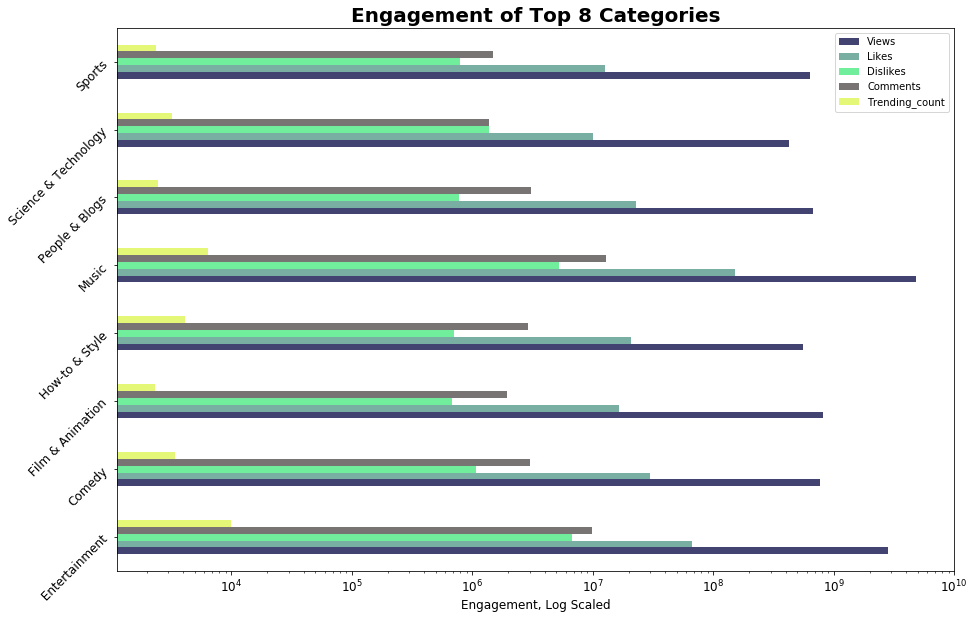

In [188]:
#Horizontal Bar Chart of Engagement for Top 8 Categories
my_colors=['#434371', '#79aea3', '#70ee9c' ,'#797474','#E4F776']
ax=Top_USnewDF.plot(kind="barh",figsize=(15,10),legend=True, fontsize=12, color=my_colors, logx=True)
ax.set_title('Engagement of Top 8 Categories',fontsize= 20, fontweight="bold")
ax.set_yticklabels(Top_USnewDF.Categories, rotation=45)
ax.set_xlabel("Engagement, Log Scaled",fontsize=12)
#Save figure
plt.savefig("USengagement.png")

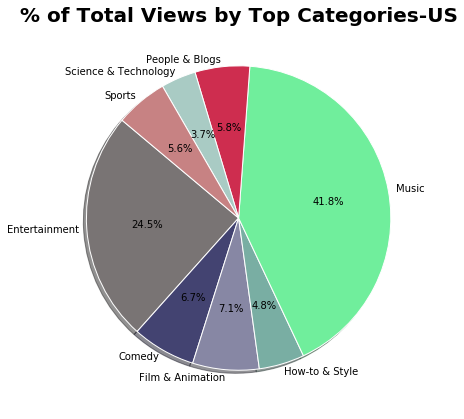

In [189]:
#Percent Views
percs = Top_USnewDF.iloc[:, 1:].apply(lambda x: x / x.sum())
my_colors2=['#797474', '#434371', "#8787a4", '#79aea3', '#70ee9c', '#ce2d4f', '#a9cbc4', '#c78283']

# Build Pie Chart
slices = percs.Views
types = 'Entertainment','Comedy','Film & Animation','How-to & Style','Music','People & Blogs','Science & Technology','Sports'

plt.figure(figsize=(10,7))
wedges, _, autotexts = plt.pie(slices, labels=types, labeldistance=1.05, colors=my_colors2,shadow=True,autopct='%1.1f%%',startangle=140)
for autotext in autotexts:
    autotext.set_color('black')
    
for pie_wedge in wedges:
    pie_wedge.set_edgecolor('white')
    
plt.title("% of Total Views by Top Categories-US", fontweight="bold", fontsize= 20)
#Save Figure
plt.savefig("US_percent_views.png")
 # Show Figure
plt.show()

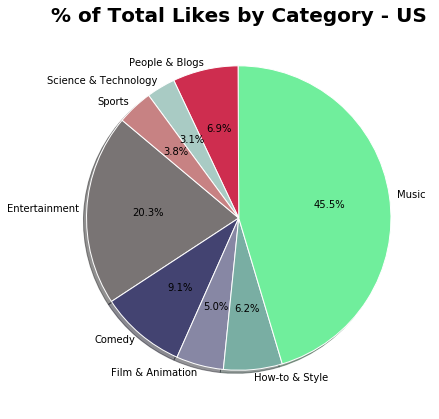

In [190]:
#Percent Likes
percs = Top_USnewDF.iloc[:, 1:].apply(lambda x: x / x.sum())
my_colors2=['#797474', '#434371', "#8787a4", '#79aea3', '#70ee9c', '#ce2d4f', '#a9cbc4', '#c78283']
# Build Pie Chart
slices = percs.Likes
types = 'Entertainment', 'Comedy', 'Film & Animation', 'How-to & Style', 'Music', 'People & Blogs', 'Science & Technology', 'Sports'

plt.figure(figsize=(10,7))
wedges, _, autotexts = plt.pie(slices, labels=types, labeldistance=1.05, colors=my_colors2,shadow=True,autopct='%1.1f%%',startangle=140)
for autotext in autotexts:
    autotext.set_color('black')
    
for pie_wedge in wedges:
    pie_wedge.set_edgecolor('white')
    
plt.title("% of Total Likes by Category - US", fontweight="bold", fontsize= 20)
# Save Figure
plt.savefig("percent_Likes.png")
 # Show Figure
plt.show()

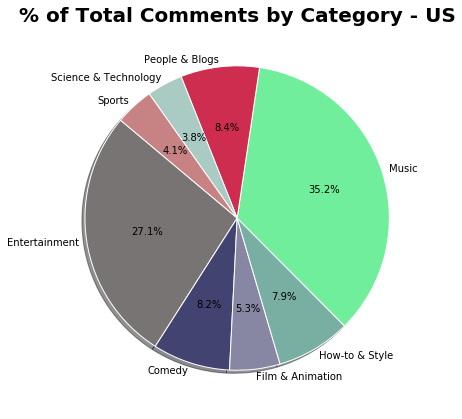

In [191]:
#Percent Comments
percs = Top_USnewDF.iloc[:, 1:].apply(lambda x: x / x.sum())
my_colors2=['#797474', '#434371', "#8787a4", '#79aea3', '#70ee9c', '#ce2d4f', '#a9cbc4', '#c78283']
# Build Pie Chart
slices = percs.Comments
types = 'Entertainment','Comedy','Film & Animation','How-to & Style','Music','People & Blogs','Science & Technology','Sports'

plt.figure(figsize=(10,7))
wedges, _, autotexts = plt.pie(slices, labels=types, labeldistance=1.05, colors=my_colors2,shadow=True,autopct='%1.1f%%',startangle=140)
for autotext in autotexts:
    autotext.set_color('black')
    
for pie_wedge in wedges:
    pie_wedge.set_edgecolor('white')
    
plt.title("% of Total Comments by Category - US", fontweight="bold", fontsize= 20)
# Save Figure
plt.savefig("percent_Comments.png")
 # Show Figure
plt.show()

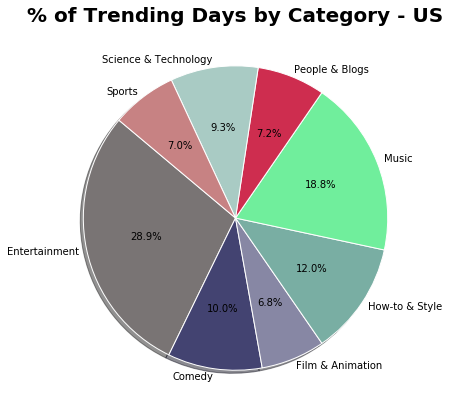

In [192]:
# percent of Trending
percs = Top_USnewDF.iloc[:, 1:].apply(lambda x: x / x.sum())
my_colors2=['#797474', '#434371', "#8787a4", '#79aea3', '#70ee9c', '#ce2d4f', '#a9cbc4', '#c78283']
# Build Pie Chart
slices = percs.Trending_count
types = 'Entertainment', 'Comedy', 'Film & Animation', 'How-to & Style', 'Music', 'People & Blogs', 'Science & Technology', 'Sports'

plt.figure(figsize=(10,7))
wedges, _, autotexts = plt.pie(slices, labels=types, labeldistance=1.05, colors=my_colors2,shadow=True,autopct='%1.1f%%',startangle=140)
for autotext in autotexts:
    autotext.set_color('black')
    
for pie_wedge in wedges:
    pie_wedge.set_edgecolor('white')
    
plt.title("% of Trending Days by Category - US", fontweight="bold", fontsize= 20)
# Save Figure
plt.savefig("US_percent_Trending.png")
 # Show Figure
plt.show()

# US LESS TRENDED CATEGORIES - CHARTS

In [193]:
#Gets categories with less than 10M likes
USless_likes = USlikes_category.query("likes < 10000000")
#Gets categories with less than 10M likes
USless_dislikes = USdislikes_category.query("dislikes < 650000")
#gets categories with less than 250M views
USless_views = USviews_category.query("views < 250000000")
#gets categories with less than 1.39M comments
USless_comments = UScomment_category.query("comment_count < 1390000")
#gets categories that trended less than 2250 times
USless_trending = US_trending_count.query("trending_count < 2250")

In [194]:
#Creates a new dataframe for bottom set of  categories
Bottom_USnewDF = pd.DataFrame()
Bottom_USnewDF["Categories"] = USless_views.index.values
Bottom_USnewDF["Views"] = USless_views.views.values
Bottom_USnewDF["Likes"] = USless_likes.likes.values
Bottom_USnewDF["Dislikes"] = USless_dislikes.dislikes.values
Bottom_USnewDF["Comments"] = USless_comments.comment_count.values
Bottom_USnewDF["Trending_count"] = USless_trending.trending_count.values
Bottom_USnewDF


,Categories,Views,Likes,Dislikes,Comments,Trending_count
0,Autos & Vehicles,102913586,730306,46397,123347,384
1,Education,152579019,5402061,189946,634097,1656
2,Gaming,239483937,6991366,624992,1386717,817
3,News & Politics,234030841,3026635,563262,1087653,57
4,Non-profits & Activism,31064609,2388624,67902,740432,920
5,Pets & Animals,104212968,2670957,547989,359329,57
6,Shows,3049600,61741,1451,6085,2174
7,Travel & Events,58840828,587696,39341,105703,402


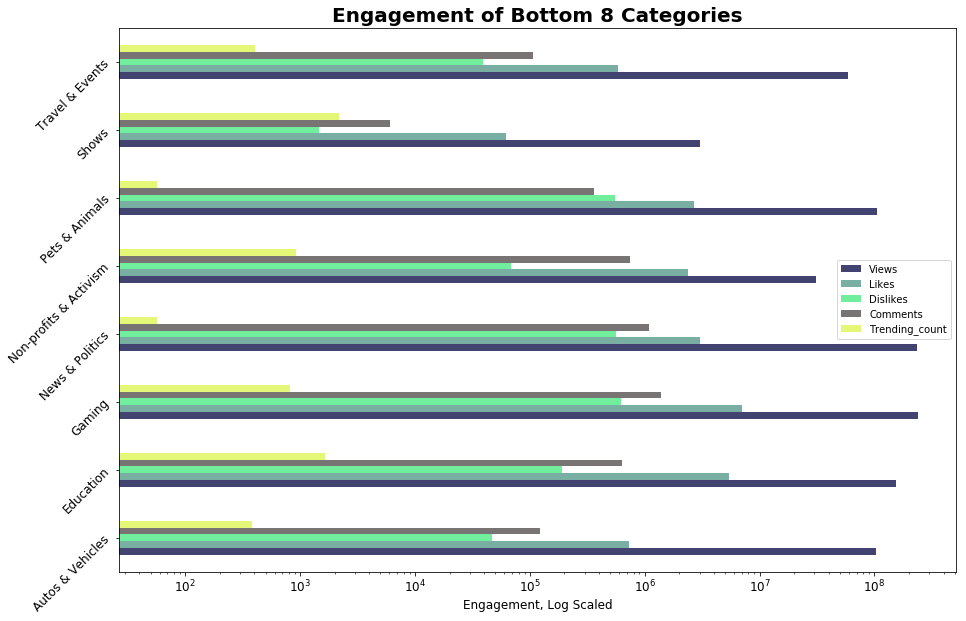

In [195]:
#Horizontal Bar Chart of Engagement for Bottom Categories
my_colors=['#434371', '#79aea3', '#70ee9c' ,'#797474','#E4F776']
ax=Bottom_USnewDF.plot(kind="barh",figsize=(15,10),legend=True, fontsize=12, color=my_colors, logx=True)
ax.set_title('Engagement of Bottom 8 Categories',fontsize= 20, fontweight="bold")
ax.set_yticklabels(Bottom_USnewDF.Categories, rotation=45)
ax.set_xlabel("Engagement, Log Scaled",fontsize=12)
#Save figure
plt.savefig("USengagement_Bottom.png")

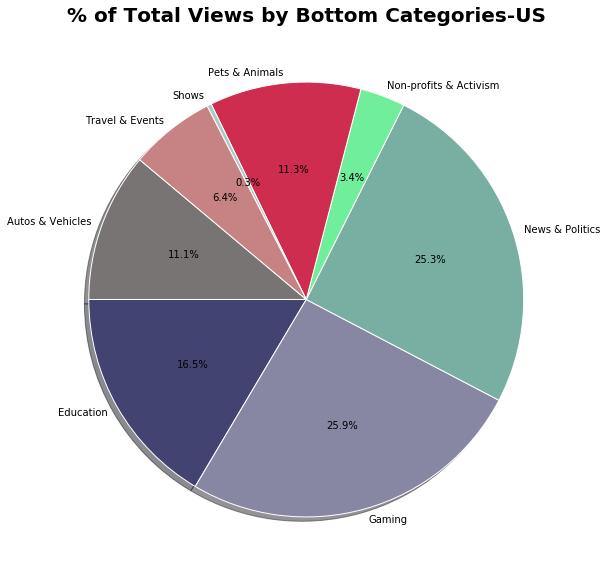

In [196]:
#Percent Views
percs = Bottom_USnewDF.iloc[:, 1:].apply(lambda x: x / x.sum())
my_colors2=['#797474', '#434371', "#8787a4", '#79aea3', '#70ee9c', '#ce2d4f', '#a9cbc4', '#c78283']

# Build Pie Chart
slices = percs.Views
types = 'Autos & Vehicles','Education','Gaming','News & Politics','Non-profits & Activism','Pets & Animals','Shows','Travel & Events'

plt.figure(figsize=(15,10))
wedges, _, autotexts = plt.pie(slices, labels=types, labeldistance=1.05, colors=my_colors2,shadow=True,autopct='%1.1f%%',startangle=140)
for autotext in autotexts:
    autotext.set_color('black')
    
for pie_wedge in wedges:
    pie_wedge.set_edgecolor('white')
    
plt.title("% of Total Views by Bottom Categories-US", fontweight="bold", fontsize= 20)
#Save Figure
plt.savefig("US_percent_views.png")
 # Show Figure
plt.show()

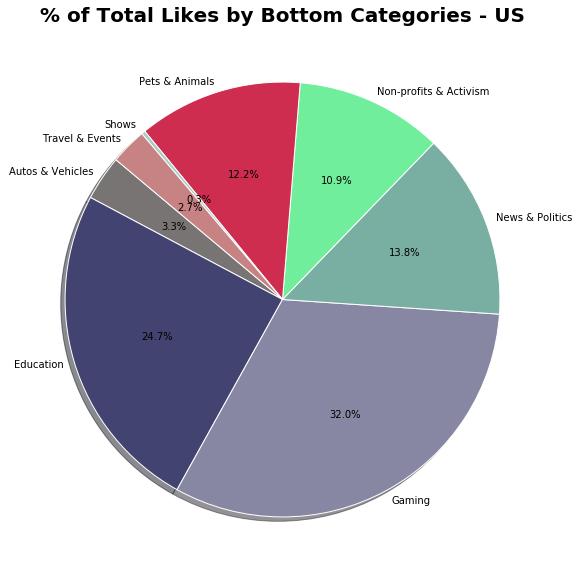

In [198]:
#Percent Likes
percs = Bottom_USnewDF.iloc[:, 1:].apply(lambda x: x / x.sum())
my_colors2=['#797474', '#434371', "#8787a4", '#79aea3', '#70ee9c', '#ce2d4f', '#a9cbc4', '#c78283']
# Build Pie Chart
slices = percs.Likes
types = 'Autos & Vehicles','Education','Gaming','News & Politics','Non-profits & Activism','Pets & Animals','Shows','Travel & Events'

plt.figure(figsize=(15,10))
wedges, _, autotexts = plt.pie(slices, labels=types, labeldistance=1.05, colors=my_colors2,shadow=True,autopct='%1.1f%%',startangle=140)
for autotext in autotexts:
    autotext.set_color('black')
    
for pie_wedge in wedges:
    pie_wedge.set_edgecolor('white')
    
plt.title("% of Total Likes by Bottom Categories - US", fontweight="bold", fontsize= 20)
# Save Figure
plt.savefig("percent_Likes.png")
 # Show Figure
plt.show()

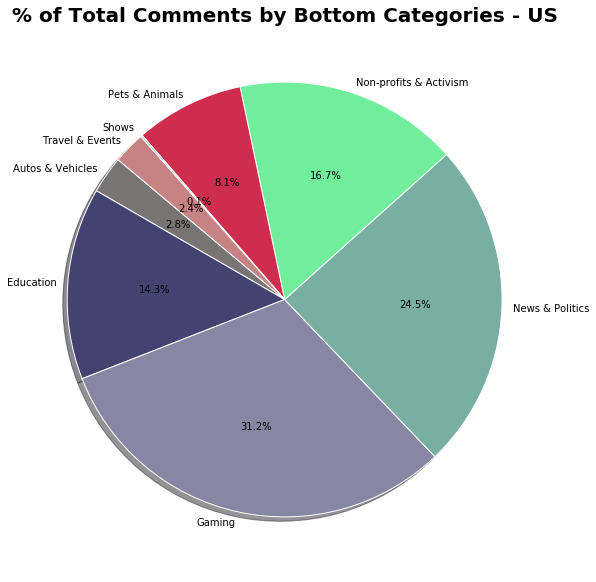

In [199]:
#Percent Comments
percs = Bottom_USnewDF.iloc[:, 1:].apply(lambda x: x / x.sum())
my_colors2=['#797474', '#434371', "#8787a4", '#79aea3', '#70ee9c', '#ce2d4f', '#a9cbc4', '#c78283']
# Build Pie Chart
slices = percs.Comments
types = 'Autos & Vehicles','Education','Gaming','News & Politics','Non-profits & Activism','Pets & Animals','Shows','Travel & Events'

plt.figure(figsize=(15,10))
wedges, _, autotexts = plt.pie(slices, labels=types, labeldistance=1.05, colors=my_colors2,shadow=True,autopct='%1.1f%%',startangle=140)
for autotext in autotexts:
    autotext.set_color('black')
    
for pie_wedge in wedges:
    pie_wedge.set_edgecolor('white')
    
plt.title("% of Total Comments by Bottom Categories - US", fontweight="bold", fontsize= 20)
# Save Figure
plt.savefig("percent_Comments.png")
 # Show Figure
plt.show()

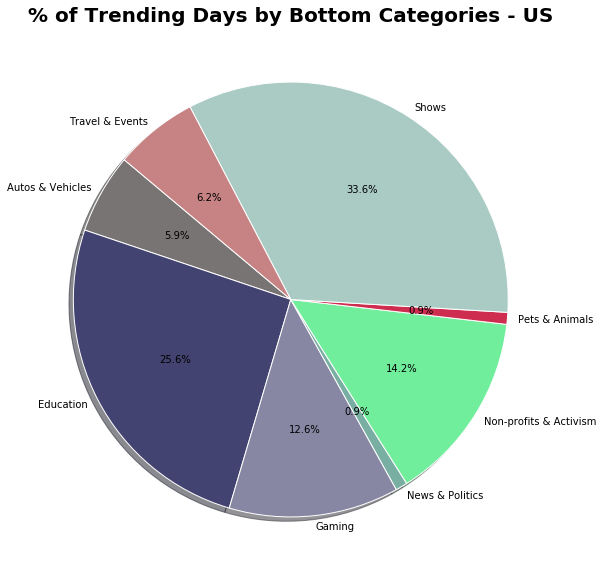

In [200]:
# percent of Trending
percs = Bottom_USnewDF.iloc[:, 1:].apply(lambda x: x / x.sum())
my_colors2=['#797474', '#434371', "#8787a4", '#79aea3', '#70ee9c', '#ce2d4f', '#a9cbc4', '#c78283']
# Build Pie Chart
slices = percs.Trending_count
types = 'Autos & Vehicles','Education','Gaming','News & Politics','Non-profits & Activism','Pets & Animals','Shows','Travel & Events'
plt.figure(figsize=(15,10))
wedges, _, autotexts = plt.pie(slices, labels=types, labeldistance=1.05, colors=my_colors2,shadow=True,autopct='%1.1f%%',startangle=140)
for autotext in autotexts:
    autotext.set_color('black')
    
for pie_wedge in wedges:
    pie_wedge.set_edgecolor('white')
    
plt.title("% of Trending Days by Bottom Categories - US", fontweight="bold", fontsize= 20)
# Save Figure
plt.savefig("US_percent_Trending.png")
 # Show Figure
plt.show()

# France Analysis By Category - Likes,Views,Comments & Trending count

In [219]:
#Grouped by category and video_id for getting likes of each video at the last day of trending
FR_likes = organized_FR.groupby(["Category Name","video_id"])["likes"].last()
FRlikes_category = pd.DataFrame(FR_likes.groupby("Category Name").sum())
FRlikes_category.sort_values(by= "likes",ascending=True)

#Grouped by category and video_id for getting dislikes of each video at the last day of trending
FR_dislikes = organized_FR.groupby(["Category Name","video_id"])["dislikes"].last()
FRdislikes_category = pd.DataFrame(FR_dislikes.groupby("Category Name").sum())
FRdislikes_category.sort_values(by= "dislikes",ascending=True)

#Gets views on the last day of Trnding
FR_views = organized_FR.groupby(["Category Name","video_id"])["views"].last()
FRviews_category = pd.DataFrame(FR_views.groupby("Category Name").sum())
FRviews_category.sort_values(by= "views",ascending=True)

#Gets Comment_count on the last day of trending
FR_comment_count = organized_FR.groupby(["Category Name","video_id"])["comment_count"].last()
FRcomment_category = pd.DataFrame(FR_comment_count.groupby("Category Name").sum())
FRcomment_category.sort_values(by= "comment_count",ascending=True)

#Gets Video Trending Analysis
Ftrending_df = organized_FR.groupby(["Category Name","video_id"])["trending_date"].count().reset_index()
FR_trending = Ftrending_df.groupby("Category Name")["trending_date"].sum().reset_index()
FR_trending_count = FR_trending.rename(index=str,columns={"trending_date":"trending_count"})




,dislikes
Category Name,
Trailers,9
Movies,1034
Travel & Events,7071
Pets & Animals,30369
Autos & Vehicles,42315
Shows,100505
Education,123759
Science & Technology,263900
How-to & Style,447307


# FRANCE TOP TRENDED CATEGORIES - CHARTS

In [229]:
#gets top categories with greater than 8M likes
FRhigher_likes = FRlikes_category.query("likes >= 8000000")
#gets top categories with greater than 8M likes
FRhigher_dislikes = FRdislikes_category.query("dislikes >= 500000")
#gets top categories with greater than 250M views
FRhigher_views = FRviews_category.query("views >= 250000000")
#gets top categories with greater than 1.39M comments
FRhigher_comments = FRcomment_category.query("comment_count >= 1200000")
#gets top categories that trended more than 2250 times
FRhigher_trending = FR_trending_count.query("trending_count >= 1000")

In [230]:
#Creates a new dataframe for top categories
Top_FRnewDF = pd.DataFrame()
Top_FRnewDF["Categories"] = FRhigher_views.index.values
Top_FRnewDF["Views"] = FRhigher_views.views.values
Top_FRnewDF["Likes"] = FRhigher_likes.likes.values
Top_FRnewDF["Dislikes"] = FRhigher_dislikes.dislikes.values
Top_FRnewDF["Comments"] = FRhigher_comments.comment_count.values
Top_FRnewDF["Trending_count"] = FRhigher_trending.trending_count.values


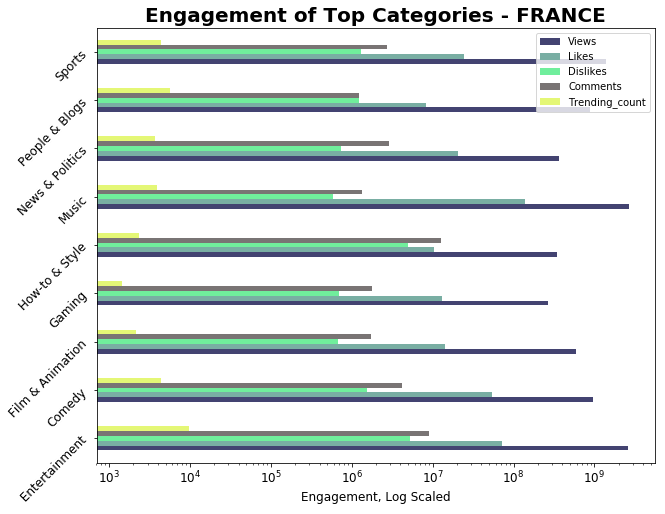

In [231]:
#Horizontal Bar Chart of Engagement for Top 8 Categories
my_colors=['#434371', '#79aea3', '#70ee9c' ,'#797474','#E4F776']
ax=Top_FRnewDF.plot(kind="barh",figsize=(10,8),legend=True, fontsize=12, color=my_colors, logx=True)
ax.set_title('Engagement of Top Categories - FRANCE',fontsize= 20, fontweight="bold")
ax.set_yticklabels(Top_FRnewDF.Categories, rotation=45)
ax.set_xlabel("Engagement, Log Scaled",fontsize=12)
#Save figure
plt.savefig("FRengagement.png")

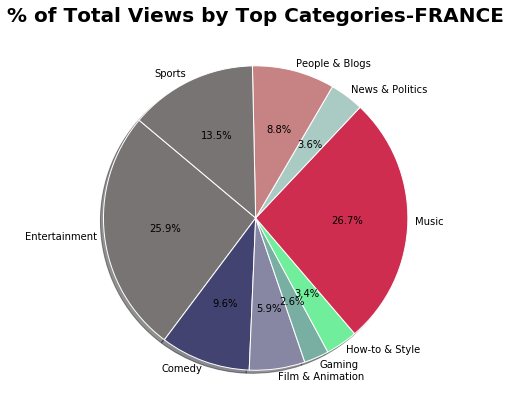

In [207]:
#Percent Views
percs = Top_FRnewDF.iloc[:, 1:].apply(lambda x: x / x.sum())
my_colors2=['#797474', '#434371', "#8787a4", '#79aea3', '#70ee9c', '#ce2d4f', '#a9cbc4', '#c78283']

# Build Pie Chart
slices = percs.Views
types = 'Entertainment','Comedy','Film & Animation','Gaming','How-to & Style','Music','News & Politics','People & Blogs','Sports'

plt.figure(figsize=(10,7))
wedges, _, autotexts = plt.pie(slices, labels=types, labeldistance=1.05, colors=my_colors2,shadow=True,autopct='%1.1f%%',startangle=140)
for autotext in autotexts:
    autotext.set_color('black')
    
for pie_wedge in wedges:
    pie_wedge.set_edgecolor('white')
    
plt.title("% of Total Views by Top Categories-FRANCE", fontweight="bold", fontsize= 20)
#Save Figure
plt.savefig("FR_percent_views.png")
 # Show Figure
plt.show()

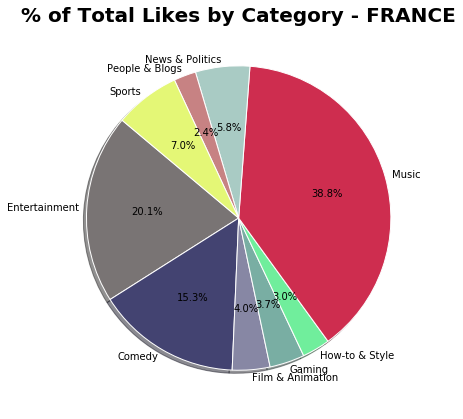

In [208]:
#Percent Likes
percs = Top_FRnewDF.iloc[:, 1:].apply(lambda x: x / x.sum())
my_colors2=['#797474', '#434371', "#8787a4", '#79aea3', '#70ee9c', '#ce2d4f', '#a9cbc4', '#c78283','#E4F776']
# Build Pie Chart
slices = percs.Likes
types = 'Entertainment','Comedy','Film & Animation','Gaming','How-to & Style','Music','News & Politics','People & Blogs','Sports'

plt.figure(figsize=(10,7))
wedges, _, autotexts = plt.pie(slices, labels=types, labeldistance=1.05, colors=my_colors2,shadow=True,autopct='%1.1f%%',startangle=140)
for autotext in autotexts:
    autotext.set_color('black')
    
for pie_wedge in wedges:
    pie_wedge.set_edgecolor('white')
    
plt.title("% of Total Likes by Category - FRANCE", fontweight="bold", fontsize= 20)
# Save Figure
plt.savefig("FRpercent_Likes.png")
 # Show Figure
plt.show()

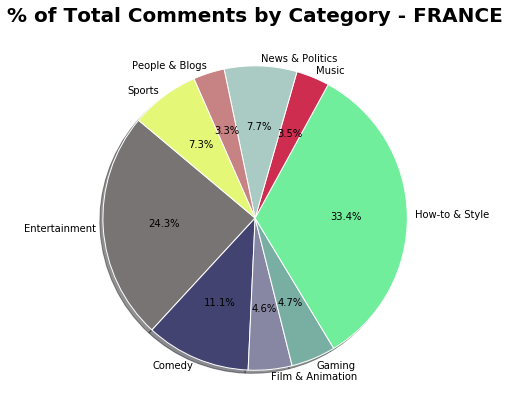

In [209]:
#Percent Comments
percs = Top_FRnewDF.iloc[:, 1:].apply(lambda x: x / x.sum())
my_colors2=['#797474', '#434371', "#8787a4", '#79aea3', '#70ee9c', '#ce2d4f', '#a9cbc4', '#c78283','#E4F776']
# Build Pie Chart
slices = percs.Comments
types = 'Entertainment','Comedy','Film & Animation','Gaming','How-to & Style','Music','News & Politics','People & Blogs','Sports'

plt.figure(figsize=(10,7))
wedges, _, autotexts = plt.pie(slices, labels=types, labeldistance=1.05, colors=my_colors2,shadow=True,autopct='%1.1f%%',startangle=140)
for autotext in autotexts:
    autotext.set_color('black')
    
for pie_wedge in wedges:
    pie_wedge.set_edgecolor('white')
    
plt.title("% of Total Comments by Category - FRANCE", fontweight="bold", fontsize= 20)
# Save Figure
plt.savefig("FRpercent_Comments.png")
 # Show Figure
plt.show()

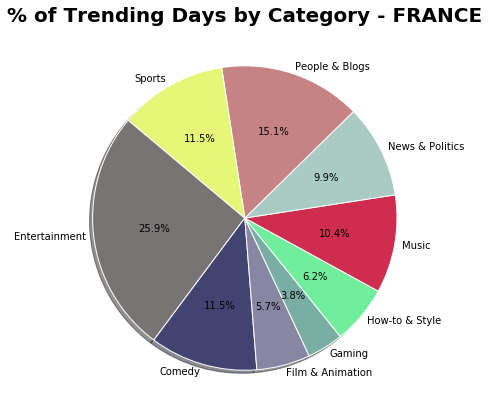

In [210]:
# percent of Trending
percs = Top_FRnewDF.iloc[:, 1:].apply(lambda x: x / x.sum())
my_colors2=['#797474', '#434371', "#8787a4", '#79aea3', '#70ee9c', '#ce2d4f', '#a9cbc4', '#c78283','#E4F776']
# Build Pie Chart
slices = percs.Trending_count
types = 'Entertainment','Comedy','Film & Animation','Gaming','How-to & Style','Music','News & Politics','People & Blogs','Sports'
plt.figure(figsize=(10,7))
wedges, _, autotexts = plt.pie(slices, labels=types, labeldistance=1.05, colors=my_colors2,shadow=True,autopct='%1.1f%%',startangle=140)
for autotext in autotexts:
    autotext.set_color('black')
    
for pie_wedge in wedges:
    pie_wedge.set_edgecolor('white')
    
plt.title("% of Trending Days by Category - FRANCE", fontweight="bold", fontsize= 20)
# Save Figure
plt.savefig("FR_percent_Trending.png")
 # Show Figure
plt.show()

# FRANCE LOW TRENDED CATEGORIES - CHARTS

In [233]:
#gets top categories with greater than 8M likes
FRlow_likes = FRlikes_category.query("likes < 8000000")
#gets top categories with greater than 8M likes
FRlow_dislikes = FRdislikes_category.query("dislikes < 500000")
#gets top categories with greater than 250M views
FRlow_views = FRviews_category.query("views < 250000000")
#gets top categories with greater than 1.39M comments
FRlow_comments = FRcomment_category.query("comment_count < 1200000")
#gets top categories that trended more than 2250 times
FRlow_trending = FR_trending_count.query("trending_count < 1000")

In [234]:
#Creates a new dataframe for top categories
Low_FRnewDF = pd.DataFrame()
Low_FRnewDF["Categories"] = FRlow_views.index.values
Low_FRnewDF["Views"] = FRlow_views.views.values
Low_FRnewDF["Likes"] = FRlow_likes.likes.values
Low_FRnewDF["Dislikes"] = FRlow_dislikes.dislikes.values
Low_FRnewDF["Comments"] = FRlow_comments.comment_count.values
Low_FRnewDF["Trending_count"] = FRlow_trending.trending_count.values


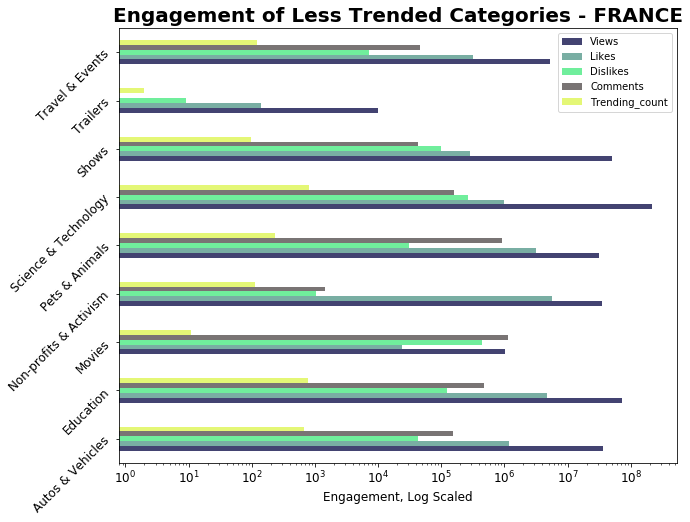

In [235]:
#Horizontal Bar Chart of Engagement for Top 8 Categories
my_colors=['#434371', '#79aea3', '#70ee9c' ,'#797474','#E4F776']
ax=Low_FRnewDF.plot(kind="barh",figsize=(10,8),legend=True, fontsize=12, color=my_colors, logx=True)
ax.set_title('Engagement of Less Trended Categories - FRANCE',fontsize= 20, fontweight="bold")
ax.set_yticklabels(Low_FRnewDF.Categories, rotation=45)
ax.set_xlabel("Engagement, Log Scaled",fontsize=12)
#Save figure
plt.savefig("FR_low_engagement.png")

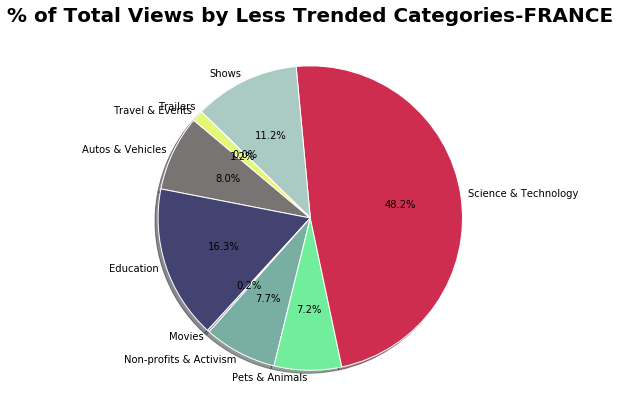

In [214]:
#Percent Views
percs = Low_FRnewDF.iloc[:, 1:].apply(lambda x: x / x.sum())
my_colors2=['#797474', '#434371', "#8787a4", '#79aea3', '#70ee9c', '#ce2d4f', '#a9cbc4', '#c78283','#E4F776']

# Build Pie Chart
slices = percs.Views
types = 'Autos & Vehicles','Education','Movies','Non-profits & Activism','Pets & Animals','Science & Technology','Shows','Trailers','Travel & Events'

plt.figure(figsize=(10,7))
wedges, _, autotexts = plt.pie(slices, labels=types, labeldistance=1.05, colors=my_colors2,shadow=True,autopct='%1.1f%%',startangle=140)
for autotext in autotexts:
    autotext.set_color('black')
    
for pie_wedge in wedges:
    pie_wedge.set_edgecolor('white')
    
plt.title("% of Total Views by Less Trended Categories-FRANCE", fontweight="bold", fontsize= 20)
#Save Figure
plt.savefig("FR_low_percent_views.png")
 # Show Figure
plt.show()

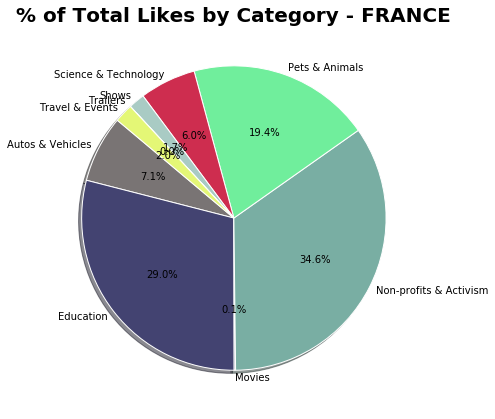

In [215]:
#Percent Likes
percs = Low_FRnewDF.iloc[:, 1:].apply(lambda x: x / x.sum())
my_colors2=['#797474', '#434371', "#8787a4", '#79aea3', '#70ee9c', '#ce2d4f', '#a9cbc4', '#c78283','#E4F776']
# Build Pie Chart
slices = percs.Likes
types = 'Autos & Vehicles','Education','Movies','Non-profits & Activism','Pets & Animals','Science & Technology','Shows','Trailers','Travel & Events'


plt.figure(figsize=(10,7))
wedges, _, autotexts = plt.pie(slices, labels=types, labeldistance=1.05, colors=my_colors2,shadow=True,autopct='%1.1f%%',startangle=140)
for autotext in autotexts:
    autotext.set_color('black')
    
for pie_wedge in wedges:
    pie_wedge.set_edgecolor('white')
    
plt.title("% of Total Likes by Category - FRANCE", fontweight="bold", fontsize= 20)
# Save Figure
plt.savefig("FRpercent_Likes.png")
 # Show Figure
plt.show()

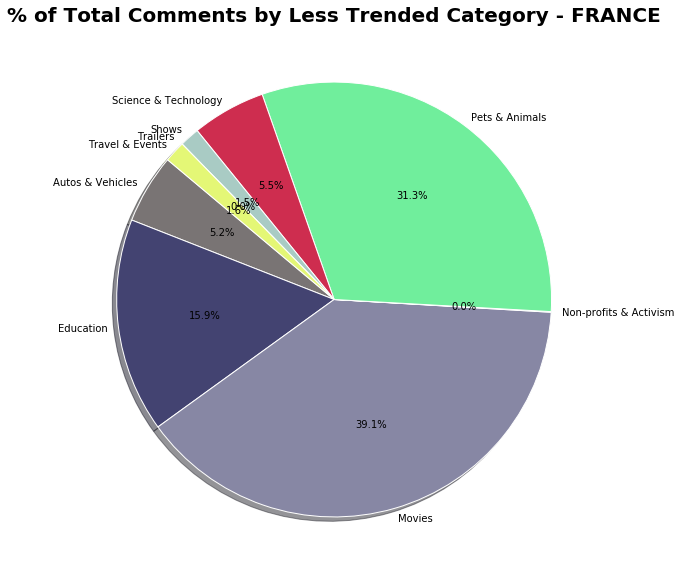

In [216]:
#Percent Comments
percs = Low_FRnewDF.iloc[:, 1:].apply(lambda x: x / x.sum())
my_colors2=['#797474', '#434371', "#8787a4", '#79aea3', '#70ee9c', '#ce2d4f', '#a9cbc4', '#c78283','#E4F776']
# Build Pie Chart
slices = percs.Comments
types = 'Autos & Vehicles','Education','Movies','Non-profits & Activism','Pets & Animals','Science & Technology','Shows','Trailers','Travel & Events'
plt.figure(figsize=(15,10))
wedges, _, autotexts = plt.pie(slices, labels=types, labeldistance=1.05, colors=my_colors2,shadow=True,autopct='%1.1f%%',startangle=140)
for autotext in autotexts:
    autotext.set_color('black')
    
for pie_wedge in wedges:
    pie_wedge.set_edgecolor('white')
    
plt.title("% of Total Comments by Less Trended Category - FRANCE", fontweight="bold", fontsize= 20)
# Save Figure
plt.savefig("FR_low_percent_Comments.png")
 # Show Figure
plt.show()

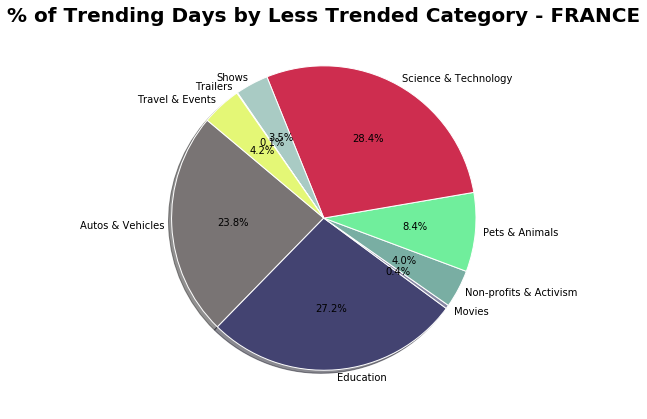

In [217]:
# percent of Trending
percs = Low_FRnewDF.iloc[:, 1:].apply(lambda x: x / x.sum())
my_colors2=['#797474', '#434371', "#8787a4", '#79aea3', '#70ee9c', '#ce2d4f', '#a9cbc4', '#c78283','#E4F776']
# Build Pie Chart
slices = percs.Trending_count
types = 'Autos & Vehicles','Education','Movies','Non-profits & Activism','Pets & Animals','Science & Technology','Shows','Trailers','Travel & Events'
plt.figure(figsize=(10,7))
wedges, _, autotexts = plt.pie(slices, labels=types, labeldistance=1.05, colors=my_colors2,shadow=True,autopct='%1.1f%%',startangle=140)
for autotext in autotexts:
    autotext.set_color('black')
    
for pie_wedge in wedges:
    pie_wedge.set_edgecolor('white')
    
plt.title("% of Trending Days by Less Trended Category - FRANCE", fontweight="bold", fontsize= 20)
# Save Figure
plt.savefig("FR_Low_percent_Trending.png")
 # Show Figure
plt.show()